<a href="https://colab.research.google.com/github/luisalfonso634/C2-G13-m/blob/main/WeatherDataSet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Wheather Data Set 2/Weather_DATASET_2_Buenos_Aires_2008_2022.xlsx')
df.shape
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,lat,lon,Nombre_Estacio,valid date,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
0,-34.49,-58.33,EZEIZA AERO,2008-01-01T00:00:00Z,0.00,26.8,-10.7,101.7,3.1,252.0,12.3,80.1,1008,5735.7
1,-34.49,-58.33,EZEIZA AERO,2008-01-02T00:00:00Z,0.00,25.8,-10.7,46.0,4.7,226.4,10.2,79.5,1010,5729.9
2,-34.49,-58.33,EZEIZA AERO,2008-01-03T00:00:00Z,0.00,26.5,-9.0,215.8,3.2,317.2,14.2,74.7,1008,5723.6
3,-34.49,-58.33,EZEIZA AERO,2008-01-04T00:00:00Z,0.07,26.6,-10.7,156.4,10.1,237.7,17.9,68.4,1014,5699.5
4,-34.49,-58.33,EZEIZA AERO,2008-01-05T00:00:00Z,0.00,20.0,-12.0,115.4,9.2,217.5,14.6,68.3,1020,5658.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54805,-34.33,-58.47,JUNIN AERO,2022-12-28T00:00:00Z,0.30,24.6,-13.8,357.8,3.1,186.3,6.7,54.8,1009,5646.5
54806,-34.33,-58.47,JUNIN AERO,2022-12-29T00:00:00Z,2.82,22.6,-13.8,104.2,7.5,220.3,18.8,71.0,1013,5599.8
54807,-34.33,-58.47,JUNIN AERO,2022-12-30T00:00:00Z,0.00,25.8,-9.2,52.6,4.3,252.4,13.2,52.3,1010,5714.5
54808,-34.33,-58.47,JUNIN AERO,2022-12-31T00:00:00Z,0.00,28.8,-11.0,318.2,3.3,245.7,6.8,44.5,1006,5754.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   lat                               54810 non-null  float64
 1   lon                               54810 non-null  float64
 2   Nombre_Estacio                    54810 non-null  object 
 3   valid date                        54810 non-null  object 
 4   precip_24h:mm                     54810 non-null  float64
 5   t_2m:C                            54810 non-null  float64
 6   t_500hPa:C                        54810 non-null  float64
 7   wind_dir_10m:d                    54810 non-null  float64
 8   wind_speed_11m:ms                 54810 non-null  float64
 9   wind_dir_500hPa:d                 54810 non-null  float64
 10  wind_speed_500hPa:ms              54810 non-null  float64
 11  relative_humidity_2m:p            54810 non-null  float64
 12  sfc_

Es una Base de Datos compartida por METEOMATICS, con 54810 filas y 14 parametros distintos (https://www.meteomatics.com/en/weather-api/?ppc_keyword=meteomatics&gclid=Cj0KCQiAn4SeBhCwARIsANeF9DLv5OV9Bz-p5NOgLt6hKZiss9g7CdySQ_hlHBY8OFuxCyXPrJQebpYaAiUOEALw_wcB)

Los parametros que estan presentes en esta base de datos son:


 0   lat, indica la latitud de la estacion.-

 1   lon, indica la longitud de la estacion.- 

 2   Nombre_Estacio, indica el nombre de la estacion.- 
 
 3   valid date, indica la fecha y la hora de observacion, en este caso todas las observaciones son a las 00:00 Z, es decir, 21:00 Hora Local Argentina (HLA).- 

 4   precip_24h:mm, indica la precipitacion acumulada en mm en las ultimas 24 hrs.-

 5   t_2m:C, indica la temperatura superficial en grados Centigrados.-

 6   t_500hPa:C, indica la temperatura en el nivel de 500 hPa, expresada en grados Centigrados.-

 7   wind_dir_10m:d, indica la direccion del viento a 10m de altura, expresada en grados entre 0 y 360.-

 8   wind_speed_11m:ms, indica la velocidad del viento a 10m de altura en m/s.-

 9   wind_dir_500hPa:d, indica la direccion del viento en 500 hPa, expresada en grados entre 0 y 360.

 10  wind_speed_500hPa:ms, indica la velocidad del viento a 500 hPa, en m/s.-

 11  relative_humidity_2m:p, indica la humedad relativa en superficie.-


 12  sfc_pressure:hPa, indica la presion atmosferica en supercie, expresada en hPa.-         
 13  layer_thickness_500hPa_1000hPa:m, indica el espesor, expresado en metros de la capa entre 500 hPa y 100 hPa. 











Con estos datos se podria hacer un modelo de pronostico para preveer de acuerdo a la existencia de ciertos parametros, la posibilidad de precipitacion en la Ciudad de Buenos Aires, por otra parte, se podria usar un Dataset disponible en la pagina del Gobierno de la Ciudad de Buenos Aires, para predecir el consumo electrico, dependiendo de las condiciones meteorologicas en la Ciudad de Buenos Aires

In [ ]:
#con esto veo las primeras 10 filas del archivo
df.head(10)

,lat,lon,Nombre_Estacio,valid date,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
0,-34.49,-58.33,EZEIZA AERO,2008-01-01T00:00:00Z,0.00,26.8,-10.7,101.7,3.1,252.0,12.3,80.1,1008,5735.7
1,-34.49,-58.33,EZEIZA AERO,2008-01-02T00:00:00Z,0.00,25.8,-10.7,46.0,4.7,226.4,10.2,79.5,1010,5729.9
2,-34.49,-58.33,EZEIZA AERO,2008-01-03T00:00:00Z,0.00,26.5,-9.0,215.8,3.2,317.2,14.2,74.7,1008,5723.6
3,-34.49,-58.33,EZEIZA AERO,2008-01-04T00:00:00Z,0.07,26.6,-10.7,156.4,10.1,237.7,17.9,68.4,1014,5699.5
4,-34.49,-58.33,EZEIZA AERO,2008-01-05T00:00:00Z,0.00,20.0,-12.0,115.4,9.2,217.5,14.6,68.3,1020,5658.2
5,-34.49,-58.33,EZEIZA AERO,2008-01-06T00:00:00Z,0.00,22.8,-11.5,112.7,5.9,221.7,16.2,66.5,1014,5679.3
6,-34.49,-58.33,EZEIZA AERO,2008-01-07T00:00:00Z,0.00,25.9,-9.2,99.7,3.6,214.4,18.1,73.1,1009,5727.3
7,-34.49,-58.33,EZEIZA AERO,2008-01-08T00:00:00Z,1.79,28.3,-8.4,11.7,4.3,229.4,18.2,67.3,1004,5773.5
8,-34.49,-58.33,EZEIZA AERO,2008-01-09T00:00:00Z,0.00,28.8,-11.4,15.1,2.8,252.4,14.8,75.1,1004,5763.6
9,-34.49,-58.33,EZEIZA AERO,2008-01-10T00:00:00Z,2.31,29.7,-11.1,358.3,4.7,288.8,13.0,65.0,1001,5759.1


In [ ]:
#con esto veo las ultimas 10 filas del archivo
df.tail(10)

,lat,lon,Nombre_Estacio,valid date,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
54800,-34.33,-58.47,JUNIN AERO,2022-12-23T00:00:00Z,0.00,24.9,-10.6,198.0,1.6,324.8,7.6,79.2,1010,5702.7
54801,-34.33,-58.47,JUNIN AERO,2022-12-24T00:00:00Z,1.67,23.6,-10.2,128.1,2.6,319.8,11.6,80.8,1009,5688.9
54802,-34.33,-58.47,JUNIN AERO,2022-12-25T00:00:00Z,36.07,20.8,-12.3,172.0,7.3,288.8,22.3,60.0,1017,5603.2
54803,-34.33,-58.47,JUNIN AERO,2022-12-26T00:00:00Z,0.00,19.5,-14.5,316.6,1.5,264.7,14.6,67.1,1016,5591.9
54804,-34.33,-58.47,JUNIN AERO,2022-12-27T00:00:00Z,0.00,22.8,-12.0,18.0,3.2,232.5,8.6,57.9,1011,5649.8
54805,-34.33,-58.47,JUNIN AERO,2022-12-28T00:00:00Z,0.30,24.6,-13.8,357.8,3.1,186.3,6.7,54.8,1009,5646.5
54806,-34.33,-58.47,JUNIN AERO,2022-12-29T00:00:00Z,2.82,22.6,-13.8,104.2,7.5,220.3,18.8,71.0,1013,5599.8
54807,-34.33,-58.47,JUNIN AERO,2022-12-30T00:00:00Z,0.00,25.8,-9.2,52.6,4.3,252.4,13.2,52.3,1010,5714.5
54808,-34.33,-58.47,JUNIN AERO,2022-12-31T00:00:00Z,0.00,28.8,-11.0,318.2,3.3,245.7,6.8,44.5,1006,5754.9
54809,-34.33,-58.47,JUNIN AERO,2023-01-01T00:00:00Z,0.00,23.2,-11.1,117.0,9.9,316.6,6.8,76.1,1012,5725.1


In [ ]:
#con esto veo 10 filas random del archivo
df.sample(10)

,lat,lon,Nombre_Estacio,valid date,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
5351,-34.35,-58.29,AEROPARQUE AERO,2008-08-23T00:00:00Z,0.00,13.9,-19.5,354.7,3.5,250.9,8.4,72.3,1026,5483.8
44367,-34.33,-60.56,JUNIN AERO,2018-06-03T00:00:00Z,0.00,8.6,-22.5,181.2,1.8,241.9,10.4,65.7,1023,5407.8
39020,-34.40,-58.30,MORON AERO,2019-10-15T00:00:00Z,34.77,12.3,-12.2,117.7,12.2,286.8,10.0,70.3,1030,5541.3
31802,-34.35,-58.29,BUENOS AIRES OBSERVATORIO,2016-01-12T00:00:00Z,0.00,26.4,-7.7,98.6,4.0,257.9,22.9,74.3,1005,5755.2
38970,-34.40,-58.30,MORON AERO,2019-08-26T00:00:00Z,0.53,14.6,-15.9,76.3,3.4,313.1,13.5,84.8,1019,5605.4
14366,-34.58,-57.54,LA PLATA AERO,2012-04-25T00:00:00Z,0.00,11.4,-17.4,119.3,2.5,259.6,20.7,59.4,1019,5503.1
23069,-34.33,-58.47,JUNIN AERO,2008-02-17T00:00:00Z,0.00,25.3,-10.2,103.8,5.8,237.4,4.9,77.4,1010,5711.9
27802,-34.49,-58.33,EZEIZA AERO,2021-01-31T00:00:00Z,53.13,20.4,-9.3,137.4,14.7,284.5,17.7,78.7,1012,5640.0
9902,-37.56,-57.35,MAR DEL PLATA AERO,2014-02-06T00:00:00Z,38.34,17.8,-8.0,128.6,1.3,293.1,29.0,86.0,1009,5685.3
8649,-37.56,-57.35,MAR DEL PLATA AERO,2010-09-02T00:00:00Z,0.06,6.4,-18.6,145.2,7.9,266.8,20.2,76.0,1030,5465.5


In [ ]:
df.shape

In [ ]:
#Me dice cuantas filas y columnas tengo en el dataframe
df.shape

(54810, 14)

In [ ]:
#ME elimina todas las filas y columnas que tienen datos faltantes
df.dropna


<bound method DataFrame.dropna of          lat    lon Nombre_Estacio            valid date  precip_24h:mm  \
0     -34.49 -58.33    EZEIZA AERO  2008-01-01T00:00:00Z           0.00   
1     -34.49 -58.33    EZEIZA AERO  2008-01-02T00:00:00Z           0.00   
2     -34.49 -58.33    EZEIZA AERO  2008-01-03T00:00:00Z           0.00   
3     -34.49 -58.33    EZEIZA AERO  2008-01-04T00:00:00Z           0.07   
4     -34.49 -58.33    EZEIZA AERO  2008-01-05T00:00:00Z           0.00   
...      ...    ...            ...                   ...            ...   
54805 -34.33 -58.47     JUNIN AERO  2022-12-28T00:00:00Z           0.30   
54806 -34.33 -58.47     JUNIN AERO  2022-12-29T00:00:00Z           2.82   
54807 -34.33 -58.47     JUNIN AERO  2022-12-30T00:00:00Z           0.00   
54808 -34.33 -58.47     JUNIN AERO  2022-12-31T00:00:00Z           0.00   
54809 -34.33 -58.47     JUNIN AERO  2023-01-01T00:00:00Z           0.00   

       t_2m:C  t_500hPa:C  wind_dir_10m:d  wind_speed_11m:ms  \
0

In [ ]:
df.shape

(54810, 14)

In [ ]:
#Llenas el campo nulo con un valor, en este caso con ceros
df.fillna(0)

In [4]:
x= np.linspace(0,5,11)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y=x**2
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

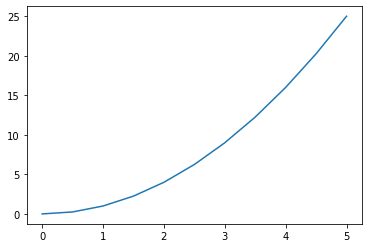

In [6]:
plt.plot(x,y)

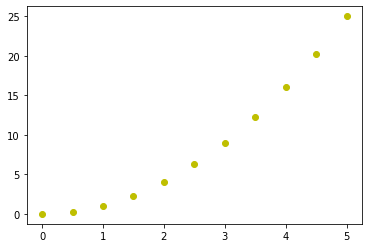

In [17]:
plt.plot(x,y,'yo')

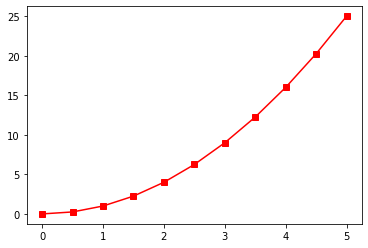

In [18]:
plt.plot(x,y,'rs-')

(array([4., 1., 1., 1., 1., 0., 1., 0., 1., 1.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

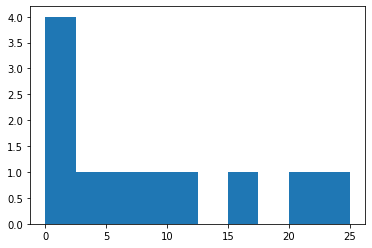

In [26]:
plt.hist(y)

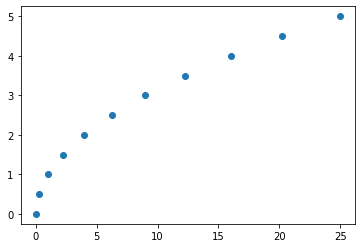

In [28]:
plt.scatter(y,x)

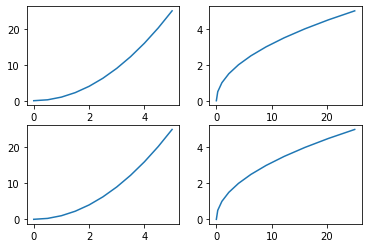

In [39]:
plt.subplot(2,2,1)
plt.plot(x,y)
plt.subplot(2,2,2)
plt.plot(y,x)
plt.subplot(2,2,3)
plt.plot(x,y)
plt.subplot(2,2,4)
plt.plot(y,x)

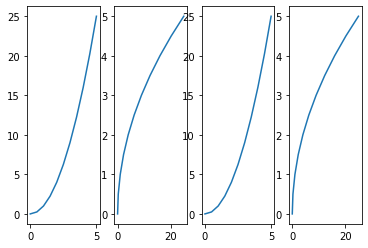

In [40]:
plt.subplot(1,4,1)
plt.plot(x,y)
plt.subplot(1,4,2)
plt.plot(y,x)
plt.subplot(1,4,3)
plt.plot(x,y)
plt.subplot(1,4,4)
plt.plot(y,x)

In [41]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

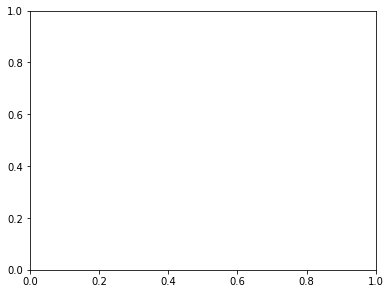

In [45]:
#Para crear una figura en el lienzo
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.9])

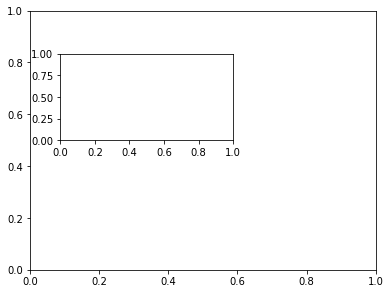

In [46]:
#Para dibujar una figura dentro de la figura
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.9])
axes2 = fig.add_axes([0.17,0.55,0.4,0.3])

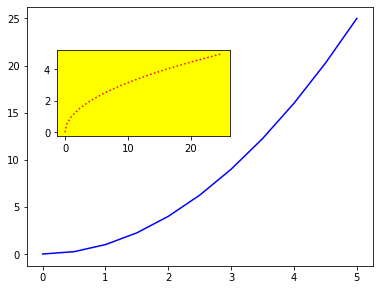

In [48]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.9])
axes2 = fig.add_axes([0.17,0.55,0.4,0.3])

axes.plot(x,y, 'b')
axes2.plot(y,x, 'r:')
axes2.set_facecolor('yellow')
plt.show()


**SUBPLOTS**

---



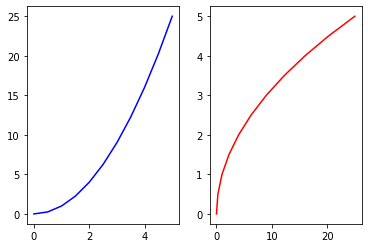

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x,y,'b')
axes[1].plot(y,x,'r')
plt.show()

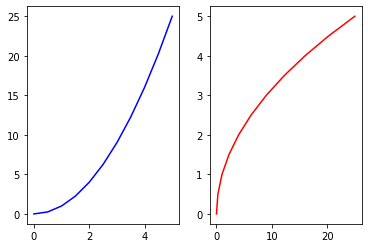

In [50]:
#Otra forma de hacer lo mismo
fig, (axes1,axes2) = plt.subplots(nrows=1, ncols=2)
axes1.plot(x,y,'b')
axes2.plot(y,x,'r')
plt.show()

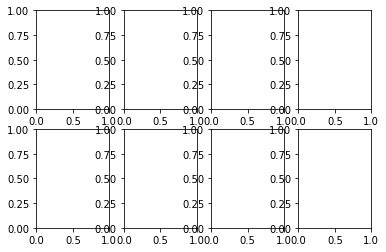

In [53]:
fig, axes = plt.subplots(2,4)
#axes.plot(x,y)
plt.show()

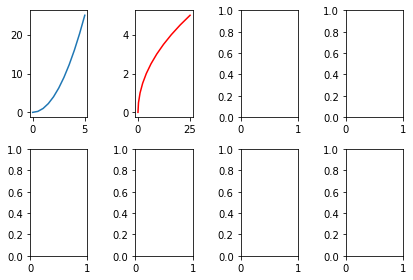

In [57]:
fig, axes = plt.subplots(2,4)

#genera un trazo accediendo a las graficas a traves del indice de la matriz
axes[0,0].plot(x,y)
axes[0,1].plot(y,x, 'r')



fig.tight_layout() #mejora la visualización de los ejes de cada gráfico

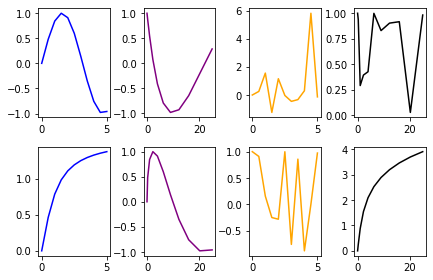

In [66]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4)
ax1.plot(x, np.sin(x), 'b')
ax2.plot(y, np.cos(x), 'purple')
ax3.plot(x, np.tan(y), 'orange')
ax4.plot(y, np.cos(y)**2, 'black')
ax5.plot(x, np.arctan(x), 'b')
ax6.plot(y, np.sin(x), 'purple')
ax7.plot(x, np.cos(y)**3, 'orange')
ax8.plot(y, np.arcsinh(y), 'black')

#mejorar la visualización de las figuras
fig.tight_layout()

**TITULOS**

Text(0.5, 1.0, 'Relacion Y - X')

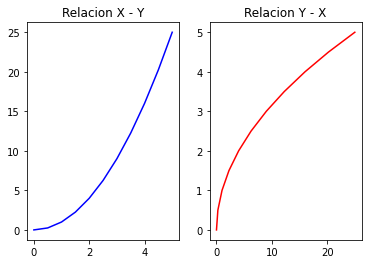

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x,y, 'b')
ax1.set_title("Relacion X - Y")

ax2.plot(y,x, 'r')
ax2.set_title("Relacion Y - X")

Text(0, 0.5, 'X')

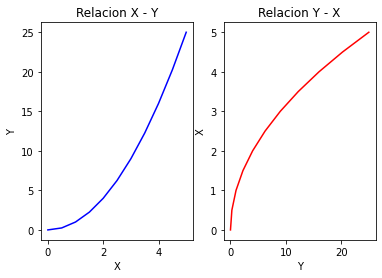

In [68]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x,y, 'b', )
ax1.set_title("Relacion X - Y")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax2.plot(y,x, 'r')
ax2.set_title("Relacion Y - X")
ax2.set_xlabel("Y")
ax2.set_ylabel("X")

Text(0, 0.5, 'X')

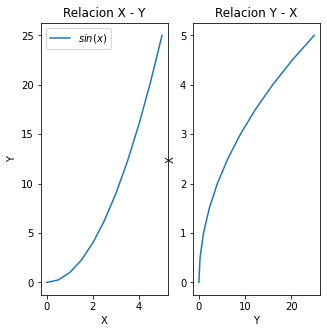

In [69]:
fig, axes = plt.subplots(1,2,figsize=(5,5))
axes[0].plot(x,y,label="$sin(x)$")
axes[0].set_title('Relacion X - Y')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].legend()
axes[1].plot(y,x)
axes[1].set_title('Relacion Y - X')
axes[1].set_xlabel('Y')
axes[1].set_ylabel('X')

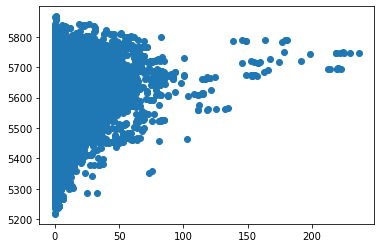

In [71]:
plt.scatter(df['precip_24h:mm'],df['layer_thickness_500hPa_1000hPa:m'])

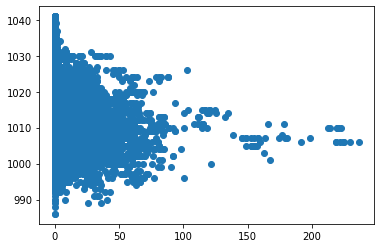

In [72]:
plt.scatter(df['precip_24h:mm'],df['sfc_pressure:hPa'])

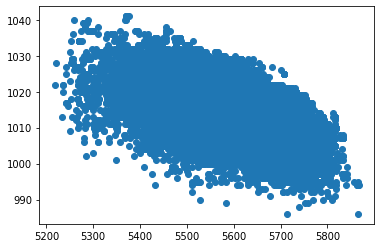

In [73]:
plt.scatter(df['layer_thickness_500hPa_1000hPa:m'],df['sfc_pressure:hPa'])

Este grafico me permite visualizar la relacion entre la presion en superficie y el espesor de la capa geopotencial entre 500 y 1000 hPa, esto me permite ver que a medida que la presion en superficie es menor, la relacion es inversamente proporcional con el espesor de la capa entre 1000 y 500 hPa, siendo mayor el espesor de la capa, a medida que disminuye la presion en superficie

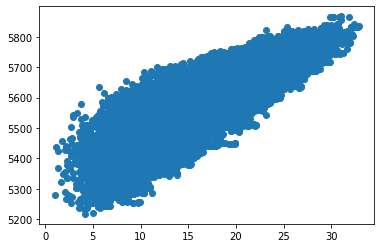

In [89]:
plt.scatter(df['t_2m:C'],df['layer_thickness_500hPa_1000hPa:m'])

Este grafico me permite visualizar la relacion entre la temperatura en superficie y el espesor de la capa geopotencial entre 500 y 1000 hPa, esto permite ver que a medida que la temperatura en superficie es menor, la relacion es directamente proporcional con el espesor de la capa entre 1000 y 500 hPa, siendo mayor el espesor de la capa, a medida que aumenta la temperatura en superficie

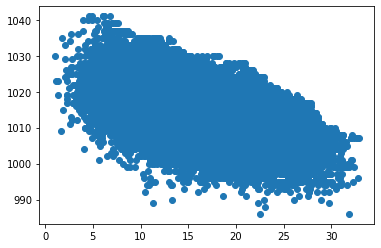

In [90]:
plt.scatter(df['t_2m:C'],df['sfc_pressure:hPa'])

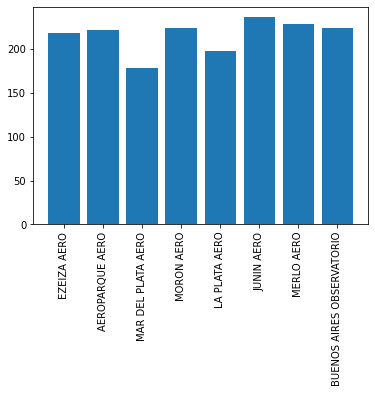

In [88]:
plt.bar(df['Nombre_Estacio'],df['precip_24h:mm'])
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

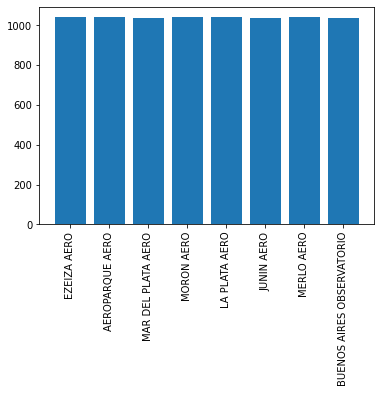

In [87]:
plt.bar(df['Nombre_Estacio'],df['sfc_pressure:hPa'])
plt.xticks(rotation=90)